In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
class Picture:
    def __init__(self,location):        # constructor takes location of file
        self.location = location 
        global BGR_img                  # BGR image as a global variable to edit it
        BGR_img = cv.imread(location)

In [3]:
class Picture(Picture):                 # inherit of itself to split it into multiple cells
    def plot_img(self):                 # method to plot the picture
        global BGR_img
        RGB_img = cv.cvtColor(BGR_img,cv.COLOR_BGR2RGB)
        plt.figure(figsize=(8,8))
        plt.imshow(RGB_img)

In [4]:
class Picture(Picture):
    def det_shapes(self):                                              # method to detect the shape
        global BGR_img
        Gray_img = cv.imread(self.location,0)                          # reading the picture as a gray
        _,thresh = cv.threshold(Gray_img,240,255,cv.THRESH_BINARY)     # threshold the gray image to black(before 240) & white(after 240)
        contour,_ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)     # making contours on the shapes (# of contours after approximation = #of sides)
        for i in contour:
            approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)            # approximate the # of contours
            x = approx.ravel()[0]                                                 # determining one of the x coordinates on the shape
            y = approx.ravel()[1]                                                 # determining one of the y coordinates on the shape
            if len(approx) == 3:                                                  # if # of approximate contours = 3, so it's a triangle
                cv.putText(BGR_img,"Triangle",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
            elif len(approx) == 4:                                                # if it's 4 , we have to choices
                _, __, w, h = cv.boundingRect(approx)                             # calculate the width and height
                if w/h >= 0.9 and w/h <= 1.1:                                     # if width nearly equals height, so it's a square
                    cv.putText(BGR_img,"Square",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
                else:                                                             # or it's a rectangle
                    cv.putText(BGR_img,"Rectangle",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
            else:                                                                 # if # of approximate contours > 4, it's a cirlce (in our program we don't have another shapes to determine it)
                cv.putText(BGR_img,"Cirlce",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

In [5]:
class Picture(Picture):
    def det_colors(self):                                                                                      # method to detect the color
        global BGR_img
            #            red                  blue                green                  yellow
        bounds = [[0,0,50],[50,50,255],[50,0,0],[255,50,50],[0,50,0],[50,255,50],[0,220,220],[100,255,255]]    # determining the bounds of everycolor we have
        for i in range(0,8,2):
            mask = cv.inRange(cv.imread(self.location), np.array(bounds[i]), np.array(bounds[i+1]))            # making a mask picture to detect every color
            contour,_ = cv.findContours(mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)                                # making contours on the shapes after we knew every color to write on it
            for j in contour:
                approx = cv.approxPolyDP(j,0.01*cv.arcLength(j,True),True)                                     # approximating the contours numbers
                x = approx.ravel()[0]
                y = approx.ravel()[1]+30                                                                       # (+30) to change the place from detecting the shapes
                if i==0:
                    cv.putText(BGR_img,"Red",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
                elif i==2:
                    cv.putText(BGR_img,"Blue",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
                elif i==4:
                    cv.putText(BGR_img,"Green",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
                elif i==6:
                    cv.putText(BGR_img,"Yellow",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

In [6]:
class Picture(Picture):
      def det_path(self):                                                                 # method to detect the path
        global BGR_img
        Black_mask = cv.inRange(cv.imread(self.location), np.array([0,0,0]), np.array([100,100,100]))     # mask picture with the black color bounds
        contour,_ = cv.findContours(Black_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)         # number of contours on the black shapes
        for i in contour:
            approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)                    # approximate # of contours
            if len(approx)>4:                                                             # if the shape has > 4 sides, so it's a path
                x, y = 0, 0                                                               # x is a variable refers to up or bottom, y is a variable refers to left or right
                for j in range(len(approx)):
                    if y==0:                                                              # if y = 0, go on, that means the barrier isn't in the first left pixel not the right pixel
                        if (BGR_img.shape[1]-approx[j][0][0])<3:
                            y = 2                                                         # if y = 2, don't change y again, the barrier is in the last right pixel
                        elif approx[j][0][0]<3:
                            y = 1                                                         # if y = 1, don't change y again, the barrier is in the first left pixel
                    if x==0:                                                              # if x = 0, go on, that means the barrier isn't in the first up pixel not the last down pixel
                        if (BGR_img.shape[0]-approx[j][0][1])<3:
                            x = 2                                                         # if x = 2, don't change x again, the barrier is in the last down pixel
                        elif approx[j][0][1]<3:
                            x = 1                                                         # if x = 1, don't change x again, the barrier is in the first up pixel
                if y == 1 and (x == 1 or x == 2):                                         # if the shape has edge in the shape and in the first left pixel, you have to go to left (imagine it)
                    cv.putText(BGR_img,"Left",(int(BGR_img.shape[1]/2),50),cv.FONT_HERSHEY_COMPLEX,2,(0,0,0))
                elif y == 2 and (x == 1 or x == 2):                                       # if the shape has edge in the shape and in the last right pixel, you have to go to right (imagine it)
                    cv.putText(BGR_img,"Right",(int(BGR_img.shape[1]/2),50),cv.FONT_HERSHEY_COMPLEX,2,(0,0,0))

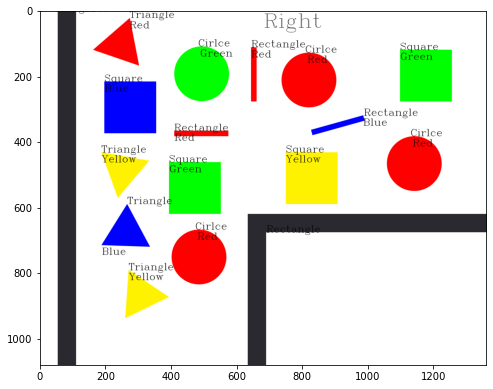

In [7]:
pic = Picture("Desktop/test1.png")
pic.det_shapes()
pic.det_colors()
pic.det_path()
pic.plot_img()